In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
dataset = pd.read_csv('data_pegawai_churn.csv')

In [24]:
dataset.head()

,ID,Nama Pegawai,Umur,Jabatan,Lama Bekerja (thn),Gaji (juta/bulan),Status Churn
0,1,Ir. Mustofa Permata,41,Manajer,5,23.3,YES
1,2,"Paiman Damanik, S.Pt",45,Customer Service,8,9.5,NO
2,3,R. Jaka Gunarto,55,IT Support,7,13.0,NO
3,4,Jarwa Sudiati,40,Audit Internal,5,19.5,NO
4,5,Titi Lazuardi,22,Analis Kredit,1,10.5,NO


In [25]:
# Rename kolom sesuai kebutuhan
dataset.rename(columns={"Umur": "Age",
                        "Gaji (juta/bulan)": "EstimatedSalary",
                        "Status Churn": "Exited"}, inplace=True)

In [26]:
# Konversi kolom churn ke angka: YES = 1, NO = 0
dataset["Exited"] = dataset["Exited"].map({"YES": 1, "NO": 0})

In [27]:
# Ambil fitur numerik: Age dan EstimatedSalary
x = dataset[['Age', 'EstimatedSalary']].values
y = dataset['Exited'].values  # Target churn

In [28]:
print("Fitur X (usia dan estimasi gaji):")
print(x)

Fitur X (usia dan estimasi gaji):
[[41.  23.3]
 [45.   9.5]
 [55.  13. ]
 [40.  19.5]
 [22.  10.5]
 [54.  16. ]
 [32.  14.3]
 [32.  26.2]
 [40.   8.8]
 [50.  10.8]
 [37.   6.4]
 [37.  17.3]
 [23.  16.3]
 [25.  16.1]
 [43.  10.9]
 [22.  22.7]
 [24.   5.8]
 [50.  20.6]
 [26.  10.6]
 [25.   6.6]
 [54.   7.8]
 [29.   4.4]
 [54.   9.9]
 [50.  14.1]
 [26.   6.8]
 [33.   8.8]
 [53.  14.1]
 [24.  11.3]
 [54.  17.8]
 [23.  12. ]
 [38.  27.6]
 [27.  13.3]
 [49.   5.3]
 [23.  23.9]
 [22.  11.5]
 [35.  14.2]
 [53.  10.4]
 [39.  16.8]
 [50.   6.8]
 [34.  12.9]
 [28.  15.9]
 [31.  14.3]
 [26.  15.1]
 [49.  10.2]
 [39.  29.7]
 [37.  16.9]
 [54.   6.3]
 [48.  17.3]
 [55.  13.4]
 [32.   9.7]
 [40.  11.3]
 [27.   8. ]
 [31.  14.9]
 [43.  12.6]
 [53.  22.3]
 [29.  11.6]
 [27.   9.4]
 [53.  10.4]
 [41.  12.5]
 [45.  24.1]
 [30.   9.2]
 [49.  13.5]
 [44.  12.5]
 [53.  13.8]
 [34.  11. ]
 [32.   9.5]
 [31.   8.8]
 [31.  21.6]
 [44.   8.9]
 [25.   7.3]
 [28.   4.6]
 [38.  14.7]
 [38.  10.3]
 [34.   6.2]
 [53

In [29]:
print("Target Y (churn):")
print(y)

Target Y (churn):
[1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0
 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [30]:
# Melihat jumlah baris
print("Jumlah data:", len(x))

Jumlah data: 200


In [31]:
# Melihat jumlah baris
print("Jumlah data:", len(y))

Jumlah data: 200


In [32]:
# Split dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
x_latih, x_test, y_latih, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [33]:
# Ukuran data latih dan data test
print("Data latih:", len(x_latih))

Data latih: 150


In [34]:
print("Data uji:", len(x_test))

Data uji: 50


In [35]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_latih = sc.fit_transform(x_latih)
x_test = sc.transform(x_test)

In [36]:
print("X latih setelah scaling:")
print(x_latih)

X latih setelah scaling:
[[-2.96522348e-02  3.96086395e-01]
 [-1.64704686e+00 -3.40526765e-02]
 [ 1.18339374e+00 -1.44992712e+00]
 [-1.30739399e-01  1.22051962e+00]
 [-1.24269821e+00  2.51093683e+00]
 [-1.24269821e+00 -1.01978805e+00]
 [-2.96522348e-02  2.70808390e+00]
 [-1.14161104e+00  1.81016859e-01]
 [-1.04052388e+00  6.11155931e-01]
 [-1.14161104e+00 -5.53804055e-01]
 [ 9.81219408e-01 -3.38734519e-01]
 [-5.35088056e-01 -4.64191748e-01]
 [-2.96522348e-02 -5.19751378e-02]
 [-1.34378537e+00 -1.05563297e+00]
 [ 1.18339374e+00 -3.92501903e-01]
 [-2.31826563e-01 -8.78200604e-02]
 [ 1.48665523e+00  1.75819345e+00]
 [-7.37262385e-01 -3.92501903e-01]
 [-1.14161104e+00 -8.04718513e-01]
 [ 8.80132243e-01 -2.84967135e-01]
 [ 7.14349294e-02  4.85698702e-01]
 [-2.31826563e-01 -2.84967135e-01]
 [-1.44487253e+00  8.44147928e-01]
 [-7.37262385e-01 -6.97183745e-01]
 [ 3.74696422e-01 -1.61302152e-02]
 [-7.37262385e-01 -5.19751378e-02]
 [-4.34000892e-01  2.88730852e+00]
 [ 4.75783586e-01 -2.84967135e

In [37]:
print("X test setelah scaling:")
print(x_test)

X test setelah scaling:
[[-1.24269821 -0.33873452]
 [-0.1307394  -0.41042436]
 [ 1.08230657  0.14517194]
 [ 1.38556806 -0.46419175]
 [-0.33291373 -0.21327729]
 [ 0.27360926  0.12724948]
 [ 1.58774239  0.62907839]
 [ 0.98121941 -1.03771051]
 [-1.5459597   0.68284578]
 [-0.02965223  1.14882977]
 [ 1.08230657  0.18101686]
 [ 0.07143493 -1.46784958]
 [ 0.17252209  1.88365068]
 [ 0.77904508 -0.58964898]
 [-0.23182656  0.55738855]
 [-0.63617522  2.45716945]
 [-1.5459597   2.04495284]
 [-0.33291373  1.8298833 ]
 [ 0.07143493  0.77245808]
 [ 1.48665523  0.80830301]
 [-1.34378537 -0.71510621]
 [ 0.37469642 -0.15950991]
 [-0.1307394   0.79038054]
 [-0.23182656 -0.17743237]
 [-0.83834955 -0.58964898]
 [-1.14161104 -0.50003667]
 [ 0.77904508  1.72234853]
 [ 0.37469642 -0.64341636]
 [-0.53508806 -0.05197514]
 [ 0.07143493  3.08445559]
 [-1.44487253 -1.19901266]
 [-0.93943671 -0.15950991]
 [-1.44487253  0.73661316]
 [ 0.67795791 -0.66133882]
 [ 1.58774239 -0.46419175]
 [-0.23182656  0.98752762]
 [ 0

In [38]:
# Training dengan K-NN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_latih, y_latih)

KNeighborsClassifier()

In [39]:
# Prediksi
y_predisi = classifier.predict(x_test)

In [40]:
# Evaluasi
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predisi)
print("Confusion Matrix:\n", cm)
print("Akurasi:", accuracy_score(y_test, y_predisi))

Confusion Matrix:
 [[31  4]
 [13  2]]
Akurasi: 0.66


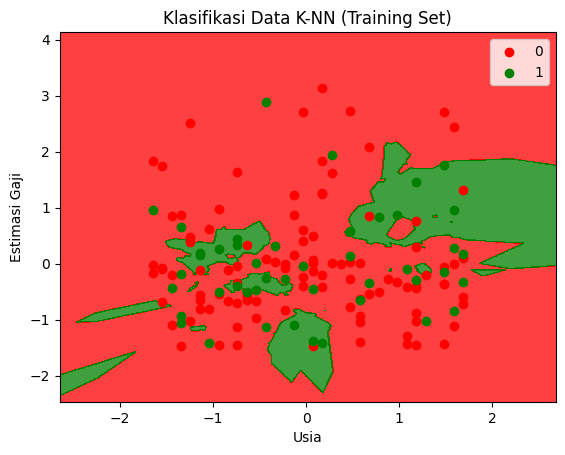

In [41]:
# Visualisasi - Training Set
from matplotlib.colors import ListedColormap
x_data, y_data = x_latih, y_latih
x_one, x_two = np.meshgrid(np.arange(start=x_data[:, 0].min() - 1, stop=x_data[:, 0].max() + 1, step=0.01),
                           np.arange(start=x_data[:, 1].min() - 1, stop=x_data[:, 1].max() + 1, step=0.01))
plt.contourf(x_one, x_two, classifier.predict(np.array([x_one.ravel(), x_two.ravel()]).T).reshape(x_one.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x_one.min(), x_one.max())
plt.ylim(x_two.min(), x_two.max())
for g, h in enumerate(np.unique(y_data)):
    plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],
                color=ListedColormap(('red', 'green'))(g), label=h)
plt.title('Klasifikasi Data K-NN (Training Set)')
plt.xlabel('Usia')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()

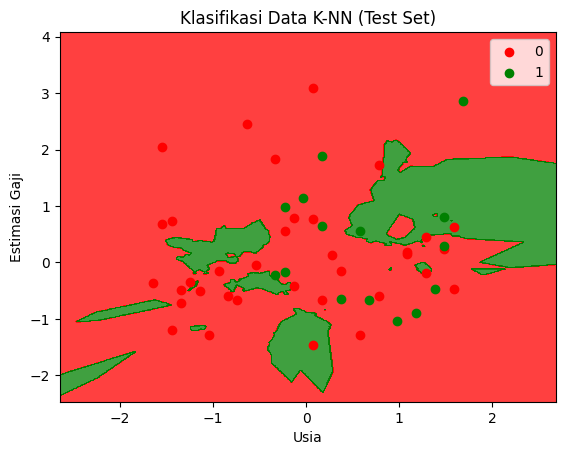

In [42]:
# Visualisasi - Test Set
x_data, y_data = x_test, y_test
x_one, x_two = np.meshgrid(np.arange(start=x_data[:, 0].min() - 1, stop=x_data[:, 0].max() + 1, step=0.01),
                           np.arange(start=x_data[:, 1].min() - 1, stop=x_data[:, 1].max() + 1, step=0.01))
plt.contourf(x_one, x_two, classifier.predict(np.array([x_one.ravel(), x_two.ravel()]).T).reshape(x_one.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x_one.min(), x_one.max())
plt.ylim(x_two.min(), x_two.max())
for g, h in enumerate(np.unique(y_data)):
    plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],
                color=ListedColormap(('red', 'green'))(g), label=h)
plt.title('Klasifikasi Data K-NN (Test Set)')
plt.xlabel('Usia')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()